# Network Analysis Lab

Complete the following exercises to help solidify your understanding of network analysis.

In [1]:
#! conda list

In [2]:
%%capture
!pip install nxviz

In [3]:
%%capture
!pip install community

In [5]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import csv
from operator import itemgetter
from networkx.algorithms import community
%config Inlinebackend.figure_format = 'retina'
import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

In [7]:
G = nx.Graph()

## U.S. Mens Basketball Data Set

In the `us_mens_basketball.csv` data set, each row represents an single basketball player's participation in a single event at a single Olympics. 

In [8]:
basketball = pd.read_csv('us_mens_basketball.csv')

In [9]:
basketball.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
1,2636,"Stephen Todd ""Steve"" Alford",M,19.0,185.0,74.0,United States,USA,1984 Summer,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Gold
2,2863,Walter Ray Allen,M,25.0,192.0,93.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
3,3874,"William Lloyd ""Willie"" Anderson, Jr.",M,21.0,200.0,86.0,United States,USA,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Bronze
4,4505,Carmelo Kyan Anthony,M,20.0,203.0,109.0,United States,USA,2004 Summer,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Bronze


## 1. Transform this data set into one that can be turned into a graph where the entities are represented by the Name field and the relationships are represented by whether the players played in the same Olympics together (Games field).

Sort descending by the number of pairwise interactions. Which pair of players have competed in the most Olympics together?

In [10]:
my_list = basketball.columns.values.tolist()
print(my_list)

['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal']


In [11]:
basketball.drop(['ID', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Year', 'Season', 'City', 'Sport', 
                 'Event', 'Medal'], axis=1, inplace=True)
basketball

,Name,Games
0,Julius Shareef Abdur-Rahim,2000 Summer
1,"Stephen Todd ""Steve"" Alford",1984 Summer
2,Walter Ray Allen,2000 Summer
3,"William Lloyd ""Willie"" Anderson, Jr.",1988 Summer
4,Carmelo Kyan Anthony,2004 Summer
...,...,...
217,Deron Michael Williams,2008 Summer
218,Deron Michael Williams,2012 Summer
219,"Howard Earl ""Howie"" Williams",1952 Summer
220,"George ""Jiff"" Wilson",1964 Summer


In [12]:
basketball2 = basketball.copy()
basketball2.head()

,Name,Games
0,Julius Shareef Abdur-Rahim,2000 Summer
1,"Stephen Todd ""Steve"" Alford",1984 Summer
2,Walter Ray Allen,2000 Summer
3,"William Lloyd ""Willie"" Anderson, Jr.",1988 Summer
4,Carmelo Kyan Anthony,2004 Summer


In [13]:
basketball3=pd.merge(basketball2, basketball, on='Games')

In [14]:
basketball3

,Name_x,Games,Name_y
0,Julius Shareef Abdur-Rahim,2000 Summer,Julius Shareef Abdur-Rahim
1,Julius Shareef Abdur-Rahim,2000 Summer,Walter Ray Allen
2,Julius Shareef Abdur-Rahim,2000 Summer,"Vincent Lamont ""Vin"" Baker"
3,Julius Shareef Abdur-Rahim,2000 Summer,"Vincent Lamar ""Vince"" Carter"
4,Julius Shareef Abdur-Rahim,2000 Summer,Kevin Maurice Garnett
...,...,...,...
2743,"James Patrick ""Jim"" Walsh",1956 Summer,"Robert Eugene ""Bob"" Jeangerard"
2744,"James Patrick ""Jim"" Walsh",1956 Summer,K. C. Jones
2745,"James Patrick ""Jim"" Walsh",1956 Summer,"William Fenton ""Bill"" Russell"
2746,"James Patrick ""Jim"" Walsh",1956 Summer,"Ronald Paul ""Ron"" Tomsic"


In [15]:
print(basketball3['Name_x'].dtypes)

object


In [16]:
print(basketball3['Name_y'].dtypes)

object


In [17]:
basketball3 = basketball3.query('Name_x != Name_y')
basketball3

,Name_x,Games,Name_y
1,Julius Shareef Abdur-Rahim,2000 Summer,Walter Ray Allen
2,Julius Shareef Abdur-Rahim,2000 Summer,"Vincent Lamont ""Vin"" Baker"
3,Julius Shareef Abdur-Rahim,2000 Summer,"Vincent Lamar ""Vince"" Carter"
4,Julius Shareef Abdur-Rahim,2000 Summer,Kevin Maurice Garnett
5,Julius Shareef Abdur-Rahim,2000 Summer,"Timothy Duane ""Tim"" Hardaway"
...,...,...,...
2742,"James Patrick ""Jim"" Walsh",1956 Summer,"William Marion ""Bill"" Hougland"
2743,"James Patrick ""Jim"" Walsh",1956 Summer,"Robert Eugene ""Bob"" Jeangerard"
2744,"James Patrick ""Jim"" Walsh",1956 Summer,K. C. Jones
2745,"James Patrick ""Jim"" Walsh",1956 Summer,"William Fenton ""Bill"" Russell"


In [18]:
#from nxviz import CircosPlot

#c = CircosPlot(G)
#c.draw()

In [19]:
#from nxviz import MatrixPlot

#m = MatrixPlot(G)
#m.draw()

In [20]:
#from nxviz import ArcPlot

#a = ArcPlot(G)
#a.draw()

## 2. Use the `from_pandas_edgelist` method to turn the data frame into a graph.

In [21]:
G = nx.from_pandas_edgelist(basketball3,  source='Name_x', target='Name_y')

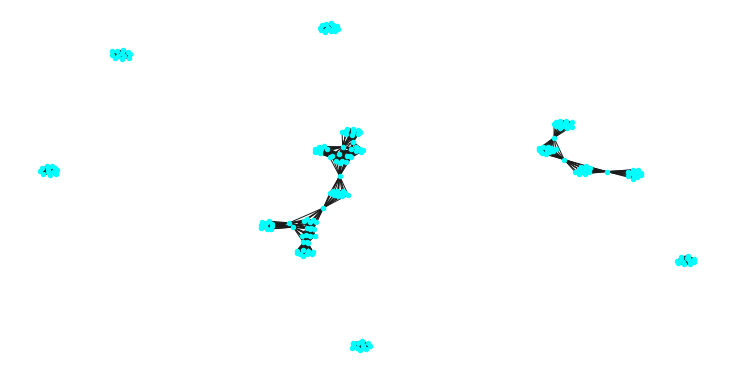

In [22]:
plt.figure(figsize=(10,5))
nx.draw(G, node_size=20, node_color='cyan')

In [23]:
#let’s create another dataframe that shows the nodes and their number of connections
Games_connections = {}
for x in G.nodes:
 Games_connections[x] = len(G[x])
s = pd.Series(Games_connections, name='connections')
df2 = s.to_frame().sort_values('connections', ascending=False)
df2

,connections
Carmelo Kyan Anthony,36
David Maurice Robinson,28
LeBron Raymone James,26
"Robert Albert ""Bob"" Kurland",26
"William Marion ""Bill"" Hougland",24
...,...
"Michel Taylor ""Tate"" Armstrong",11
William Quinn Buckner,11
"Kenneth Alan ""Kenny"" Carr",11
Adrian Delano Dantley,11


## 3. Compute and print the following graph statistics for the graph:

- Number of nodes
- Number of edges
- Average degree
- Density

In [24]:
print("Number of nodes: ",len(G.nodes))
print("Number of edges: ",len(G.edges))

Number of nodes:  196
Number of edges:  1232


In [25]:
G_deg = nx.degree_histogram(G)
print(G_deg)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 135, 0, 39, 0, 0, 0, 0, 7, 2, 3, 2, 3, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]


In [26]:
G_deg_sum = [a * b for a, b in zip(G_deg, range(0, len(G_deg)))]
print('average degree: {}'.format(sum(G_deg_sum) / G.number_of_nodes()))

average degree: 12.571428571428571


In [27]:
#same with this function
print(nx.info(G))
print("Density: ",nx.density(G))

Name: 
Type: Graph
Number of nodes: 196
Number of edges: 1232
Average degree:  12.5714
Density:  0.06446886446886448


## 4. Compute betweenness centrality for the graph and print the top 5 nodes with the highest centrality.

In [28]:
highest_betweenness_c=dict(sorted(nx.betweenness_centrality(G).items(), key=lambda item: item[1], reverse=True))

In [29]:
#max([i for i in highest_betweenness_c.values()]) 

In [30]:
for x in list(highest_betweenness_c)[0:5]:
    print (x)

Gary Dwayne Payton
Jason Frederick Kidd
Carmelo Kyan Anthony
David Maurice Robinson
William Marion "Bill" Hougland


## 5. Compute Eigenvector centrality for the graph and print the top 5 nodes with the highest centrality.

In [31]:
eigenvector = nx.eigenvector_centrality_numpy(G)
eigenvector

{'Julius Shareef Abdur-Rahim': 0.039276863784598305,
 'Walter Ray Allen': 0.03927686378459831,
 'Vincent Lamont "Vin" Baker': 0.0392768637845983,
 'Vincent Lamar "Vince" Carter': 0.039276863784598263,
 'Kevin Maurice Garnett': 0.039276863784598263,
 'Timothy Duane "Tim" Hardaway': 0.039276863784598305,
 'Allan Wade Houston': 0.039276863784598326,
 'Jason Frederick Kidd': 0.18566925214703778,
 'Antonio Keithflen McDyess': 0.03927686378459829,
 'Alonzo Harding Mourning': 0.03927686378459832,
 'Gary Dwayne Payton': 0.05969646937922625,
 'Steven Delano "Steve" Smith': 0.03927686378459832,
 'Stephen Todd "Steve" Alford': 0.011572567846822354,
 'Patrick Aloysius Ewing': 0.027955776108381594,
 'Vernon "Vern" Fleming': 0.011572567846822365,
 'Michael Jeffrey Jordan': 0.02795577610838161,
 'Joseph William "Joe" Kleine': 0.01157256784682237,
 'Jon Francis Koncak': 0.011572567846822361,
 'Christopher Paul "Chris" Mullin': 0.027955776108381628,
 'Samuel Bruce "Sam" Perkins': 0.011572567846822372,


## 6. Compute degree centrality for the graph and print the top 5 nodes with the highest centrality.

In [32]:
degree_centrality=dict(sorted(nx.closeness_centrality(G).items(), key=lambda item: item[1], reverse=True))

In [33]:
degree_centrality

{'Gary Dwayne Payton': 0.20102564102564105,
 'Jason Frederick Kidd': 0.19991500212494687,
 'David Maurice Robinson': 0.18002296211251437,
 'Carmelo Kyan Anthony': 0.17737556561085974,
 'Charles Wade Barkley': 0.17149106817353263,
 'Karl Malone': 0.17149106817353263,
 'Scottie Maurice Pippen': 0.17149106817353263,
 'John Houston Stockton': 0.17149106817353263,
 'LeBron Raymone James': 0.16908698777857656,
 'Julius Shareef Abdur-Rahim': 0.16674937965260547,
 'Walter Ray Allen': 0.16674937965260547,
 'Vincent Lamont "Vin" Baker': 0.16674937965260547,
 'Vincent Lamar "Vince" Carter': 0.16674937965260547,
 'Kevin Maurice Garnett': 0.16674937965260547,
 'Timothy Duane "Tim" Hardaway': 0.16674937965260547,
 'Allan Wade Houston': 0.16674937965260547,
 'Antonio Keithflen McDyess': 0.16674937965260547,
 'Alonzo Harding Mourning': 0.16674937965260547,
 'Steven Delano "Steve" Smith': 0.16674937965260547,
 'Mitchell James "Mitch" Richmond, III': 0.16674937965260547,
 'William Marion "Bill" Hougland

In [34]:
for x in list(degree_centrality)[0:5]:
    print (x)

Gary Dwayne Payton
Jason Frederick Kidd
David Maurice Robinson
Carmelo Kyan Anthony
Charles Wade Barkley


In [35]:
# Let's create a function to help us. (You don't need to know right now what they do.)
def display_centrality_graph(graph, centrality_values, new_range_max=10000, new_range_min=300):
    node_sizes = [v for (n, v) in centrality_values.items()]

    new_range = new_range_max - new_range_min
    old_range_min = min(node_sizes)
    old_range_max = max(node_sizes)
    old_range = old_range_max - old_range_min
    node_sizes = [(new_range_min + (((v - old_range_min) / old_range) * new_range)) for v in node_sizes]

    plt.figure(figsize=(15, 9))
    plt.axis("off")
    nx.draw_networkx(G=graph, node_size=node_sizes, node_color='g', font_color='k', alpha=0.9, font_size=10)

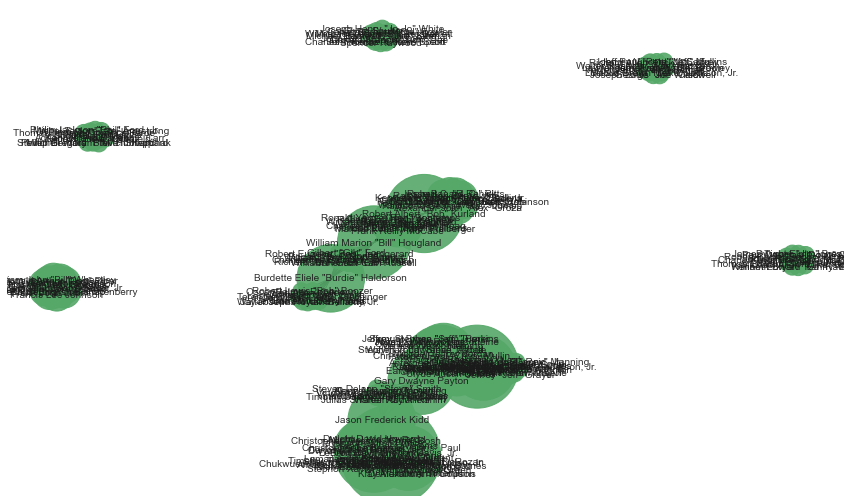

In [36]:
# It just takes the graph and the centrality measure, and makes the nodes larger when the centrality is bigger.

display_centrality_graph(graph=G, centrality_values=nx.degree_centrality(G))

## 7. Generate a network visualization for the entire graph using a Kamada-Kawai force-directed layout.

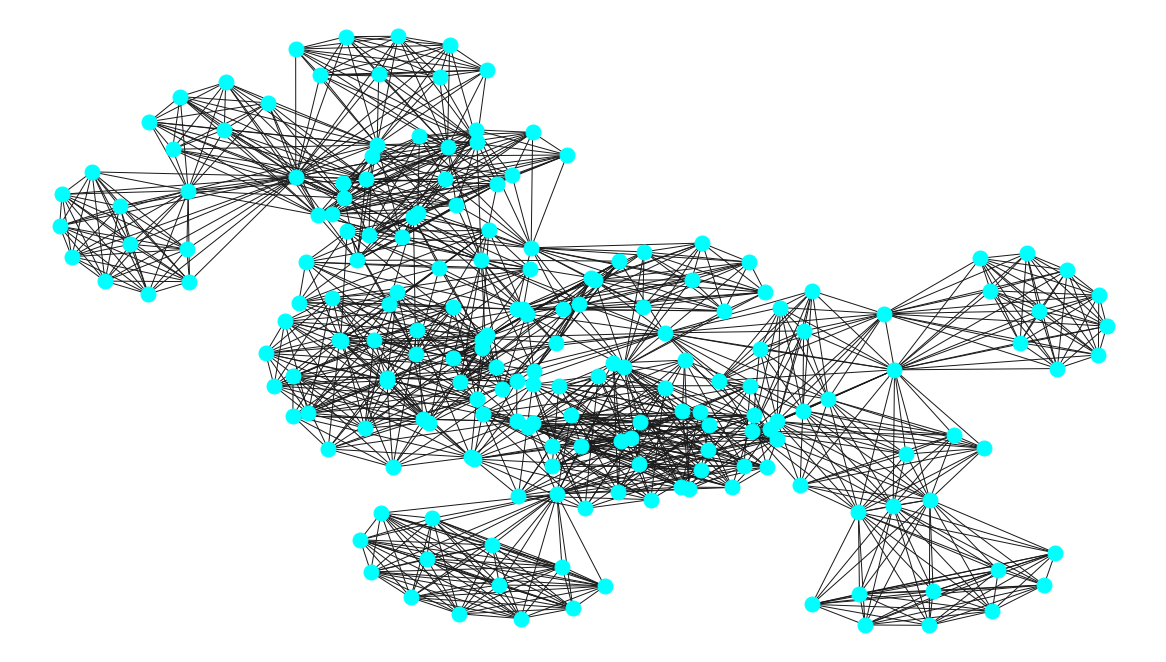

In [37]:
#nx.draw_kamada_kawai(G, node_size=224, node_color='cyan', with_labels=True)
nx.draw_kamada_kawai(G, node_size=224, node_color='cyan',)

## 8. Create and visualize an ego graph for the player with the highest betweenness centrality.

In [38]:
betweeness_centrality=dict(sorted(nx.betweenness_centrality(G).items(), key=lambda item: item[1], reverse=True))
#betweeness_centrality

In [39]:
highest_betweeness_centrality = max(betweeness_centrality.items(), key=lambda x: x[1])[0]
#Now we could plot the corresponding ego_graph with:

ego_g = nx.ego_graph(G, highest_betweeness_centrality)
d = dict(ego_g.degree)
d

{'Alonzo Harding Mourning': 11,
 'Charles Wade Barkley': 11,
 'Gary Dwayne Payton': 22,
 'Scottie Maurice Pippen': 11,
 'Anfernee Deon "Penny" Hardaway': 11,
 'Mitchell James "Mitch" Richmond, III': 11,
 'Jason Frederick Kidd': 11,
 'Antonio Keithflen McDyess': 11,
 'David Maurice Robinson': 11,
 'John Houston Stockton': 11,
 'Vincent Lamont "Vin" Baker': 11,
 'Grant Henry Hill': 11,
 'Julius Shareef Abdur-Rahim': 11,
 'Steven Delano "Steve" Smith': 11,
 'Timothy Duane "Tim" Hardaway': 11,
 'Allan Wade Houston': 11,
 'Vincent Lamar "Vince" Carter': 11,
 "Shaquille Rashuan O'Neal": 11,
 'Reginald Wayne "Reggie" Miller': 11,
 'Karl Malone': 11,
 'Walter Ray Allen': 11,
 'Hakeem Abdul Olajuwon': 11,
 'Kevin Maurice Garnett': 11}

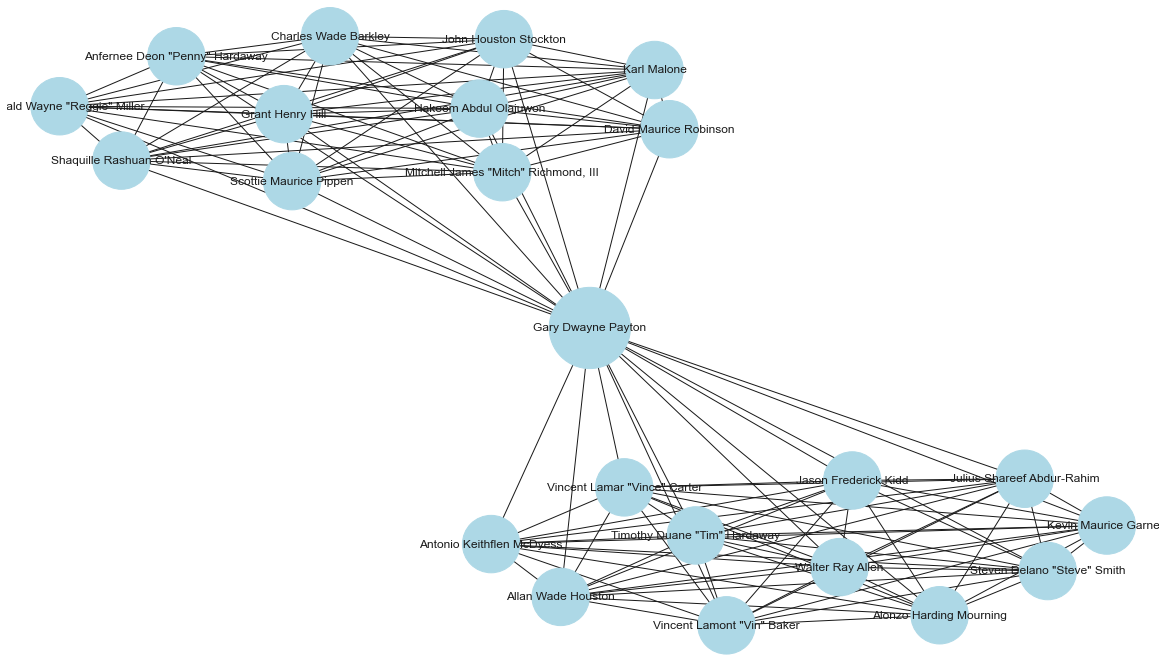

In [40]:
nx.draw(ego_g, node_color='lightblue', 
        with_labels=True, 
        nodelist=d, 
        node_size=[d[k]*300 for k in d])

## 9. Identify the communities within the entire graph and produce another visualization of it with the nodes color-coded by the community they belong to.

In [41]:
from networkx.algorithms.community.centrality import girvan_newman
import itertools

In [42]:
comp = girvan_newman(G)
for communities in itertools.islice(comp, 1):
    print(f'Communities: {tuple(sorted(c) for c in communities)}')

Communities: (['Allan Wade Houston', 'Allen Ezail Iverson', 'Alonzo Harding Mourning', "Amar'e Carsares Stoudemire", 'Andre Tyler Iguodala', 'Anthony Marshon Davis, Jr.', 'Antonio Keithflen McDyess', 'Carlos Austin Boozer, Jr.', 'Carmelo Kyan Anthony', 'Christopher Emmanuel "Chris" Paul', 'Christopher Wesson "Chris" Bosh', 'Chukwuemeka Noubuisi "Emeka" Okafor', 'DeMar Darnell DeRozan', 'DeMarcus Amir Cousins', 'Deron Michael Williams', 'Draymond Jamal Green', 'Dwight David Howard', 'Dwyane Tyrone Wade, Jr.', 'Gary Dwayne Payton', 'Harrison Bryce Jordan Barnes', 'Hyland DeAndre Jordan, Jr.', 'James Edward Harden, Jr.', 'Jason Frederick Kidd', 'Jimmy Butler III', 'Julius Shareef Abdur-Rahim', 'Kevin Maurice Garnett', 'Kevin Wayne Durant', 'Kevin Wesley Love', 'Klay Alexander Thompson', 'Kobe Bean Bryant', 'Kyle Lowry', 'Kyrie Andrew Irving', 'Lamar Joseph Odom', 'LeBron Raymone James', 'Michael Wesley Redd', 'Paul George', 'Richard Allen Jefferson', 'Russell Westbrook, Jr.', 'Shawn Dwayn

In [43]:
communities

({'Allan Wade Houston',
  'Allen Ezail Iverson',
  'Alonzo Harding Mourning',
  "Amar'e Carsares Stoudemire",
  'Andre Tyler Iguodala',
  'Anthony Marshon Davis, Jr.',
  'Antonio Keithflen McDyess',
  'Carlos Austin Boozer, Jr.',
  'Carmelo Kyan Anthony',
  'Christopher Emmanuel "Chris" Paul',
  'Christopher Wesson "Chris" Bosh',
  'Chukwuemeka Noubuisi "Emeka" Okafor',
  'DeMar Darnell DeRozan',
  'DeMarcus Amir Cousins',
  'Deron Michael Williams',
  'Draymond Jamal Green',
  'Dwight David Howard',
  'Dwyane Tyrone Wade, Jr.',
  'Gary Dwayne Payton',
  'Harrison Bryce Jordan Barnes',
  'Hyland DeAndre Jordan, Jr.',
  'James Edward Harden, Jr.',
  'Jason Frederick Kidd',
  'Jimmy Butler III',
  'Julius Shareef Abdur-Rahim',
  'Kevin Maurice Garnett',
  'Kevin Wayne Durant',
  'Kevin Wesley Love',
  'Klay Alexander Thompson',
  'Kobe Bean Bryant',
  'Kyle Lowry',
  'Kyrie Andrew Irving',
  'Lamar Joseph Odom',
  'LeBron Raymone James',
  'Michael Wesley Redd',
  'Paul George',
  'Richa

In [44]:
%%capture
!pip install python-louvain
from community import community_louvain
communities =community_louvain.best_partition(G)

In [45]:
communities

{'Julius Shareef Abdur-Rahim': 0,
 'Walter Ray Allen': 0,
 'Vincent Lamont "Vin" Baker': 0,
 'Vincent Lamar "Vince" Carter': 0,
 'Kevin Maurice Garnett': 0,
 'Timothy Duane "Tim" Hardaway': 0,
 'Allan Wade Houston': 0,
 'Jason Frederick Kidd': 0,
 'Antonio Keithflen McDyess': 0,
 'Alonzo Harding Mourning': 0,
 'Gary Dwayne Payton': 0,
 'Steven Delano "Steve" Smith': 0,
 'Stephen Todd "Steve" Alford': 3,
 'Patrick Aloysius Ewing': 3,
 'Vernon "Vern" Fleming': 3,
 'Michael Jeffrey Jordan': 3,
 'Joseph William "Joe" Kleine': 3,
 'Jon Francis Koncak': 3,
 'Christopher Paul "Chris" Mullin': 3,
 'Samuel Bruce "Sam" Perkins': 3,
 'Alvin Cyrrale Robertson': 3,
 'Wayman Lawrence Tisdale': 3,
 'Jeffrey Stephen "Jeff" Turner': 3,
 'Osie Leon Wood, III': 3,
 'William Lloyd "Willie" Anderson, Jr.': 3,
 'Stacey Orlando Augmon': 3,
 'Vernell Eufaye "Bimbo" Coles': 3,
 'Jeffrey "Jeff" Grayer': 3,
 'Hersey R. Hawkins, Jr.': 3,
 'Daniel Lewis "Dan" Majerle': 3,
 'Daniel Ricardo "Danny" Manning': 3,
 'He

## Bonus: Hierarchical Graphs

Thus far, we have analyzed graphs where the nodes represented individual players and the edges represented Olympic games that they have competed in together. We can analyze the data at a higher level if we wanted to, strippping out the players as entities and analyzing the data at the Games level. To do this, we would need to reconstruct the graph so that the *Games* field represents the entities and then use the player names as the edge criteria so that there would be an edge between two Olympic games if an player played in both of them. You already have the tools in your toolbox to be able to do this, so give it a try. 

### Create a graph with Games as the entities and then print out the graph statistics.

In [46]:
G = nx.from_pandas_edgelist(basketball3,  source='Games', target='Name_x')

In [47]:
print(nx.info(G))
print("Density: ",nx.density(G))

Name: 
Type: Graph
Number of nodes: 214
Number of edges: 222
Average degree:   2.0748
Density:  0.009740687113334211


In [48]:
G_deg = nx.degree_histogram(G)
print(G_deg)

[0, 174, 19, 2, 1, 0, 0, 0, 0, 0, 0, 0, 15, 0, 3]


In [49]:
dict(sorted(nx.degree_centrality(G).items(), key=lambda item: item[1], reverse=True))

{'1936 Summer': 0.06572769953051644,
 '1948 Summer': 0.06572769953051644,
 '1952 Summer': 0.06572769953051644,
 '2000 Summer': 0.056338028169014086,
 '1984 Summer': 0.056338028169014086,
 '1988 Summer': 0.056338028169014086,
 '2004 Summer': 0.056338028169014086,
 '2008 Summer': 0.056338028169014086,
 '2012 Summer': 0.056338028169014086,
 '2016 Summer': 0.056338028169014086,
 '1976 Summer': 0.056338028169014086,
 '1960 Summer': 0.056338028169014086,
 '1972 Summer': 0.056338028169014086,
 '1992 Summer': 0.056338028169014086,
 '1996 Summer': 0.056338028169014086,
 '1964 Summer': 0.056338028169014086,
 '1968 Summer': 0.056338028169014086,
 '1956 Summer': 0.056338028169014086,
 'Carmelo Kyan Anthony': 0.018779342723004695,
 'David Maurice Robinson': 0.014084507042253521,
 'LeBron Raymone James': 0.014084507042253521,
 'Jason Frederick Kidd': 0.009389671361502348,
 'Gary Dwayne Payton': 0.009389671361502348,
 'Patrick Aloysius Ewing': 0.009389671361502348,
 'Michael Jeffrey Jordan': 0.009389

In [50]:
dict(sorted(nx.closeness_centrality(G).items(), key=lambda item: item[1], reverse=True))

{'2000 Summer': 0.10657646667406011,
 'Gary Dwayne Payton': 0.10385072583840639,
 'Jason Frederick Kidd': 0.10332222341683689,
 '1996 Summer': 0.10075839653304441,
 '2008 Summer': 0.09976814202166315,
 'David Maurice Robinson': 0.0929190704869952,
 'Carmelo Kyan Anthony': 0.09166057291832258,
 'Charles Wade Barkley': 0.08846543312160544,
 'Karl Malone': 0.08846543312160544,
 'Scottie Maurice Pippen': 0.08846543312160544,
 'John Houston Stockton': 0.08846543312160544,
 'LeBron Raymone James': 0.08732394366197183,
 'Julius Shareef Abdur-Rahim': 0.08584700592561713,
 'Walter Ray Allen': 0.08584700592561713,
 'Vincent Lamont "Vin" Baker': 0.08584700592561713,
 'Vincent Lamar "Vince" Carter': 0.08584700592561713,
 'Kevin Maurice Garnett': 0.08584700592561713,
 'Timothy Duane "Tim" Hardaway': 0.08584700592561713,
 'Allan Wade Houston': 0.08584700592561713,
 'Antonio Keithflen McDyess': 0.08584700592561713,
 'Alonzo Harding Mourning': 0.08584700592561713,
 'Steven Delano "Steve" Smith': 0.085

In [51]:
dict(sorted(nx.betweenness_centrality(G).items(), key=lambda item: item[1], reverse=True))

{'2000 Summer': 0.11502347417840375,
 '1996 Summer': 0.10447485753092983,
 '2008 Summer': 0.10272905778486432,
 'Gary Dwayne Payton': 0.09442820444680662,
 'Jason Frederick Kidd': 0.09389671361502347,
 '1992 Summer': 0.060730209348333154,
 'Carmelo Kyan Anthony': 0.04983415517563798,
 '1952 Summer': 0.04079192133935689,
 '2016 Summer': 0.03936477003179104,
 '1988 Summer': 0.03890955797679157,
 '1956 Summer': 0.037292940030117815,
 '1984 Summer': 0.03514483125166091,
 'David Maurice Robinson': 0.034114329583370157,
 '2004 Summer': 0.03229914075648863,
 'William Marion "Bill" Hougland': 0.029763486579856495,
 '2012 Summer': 0.0283264928494798,
 '1948 Summer': 0.025910178049428644,
 'Robert Albert "Bob" Kurland': 0.023562760209053058,
 '1960 Summer': 0.022411196740189564,
 'Burdette Eliele "Burdie" Haldorson': 0.02125963327132607,
 'Mitchell James "Mitch" Richmond, III': 0.015021997814982129,
 'LeBron Raymone James': 0.012097075816182917,
 'Patrick Aloysius Ewing': 0.011958543715120895,
 

### Generate a network visualization of this graph using the layout of your choice.

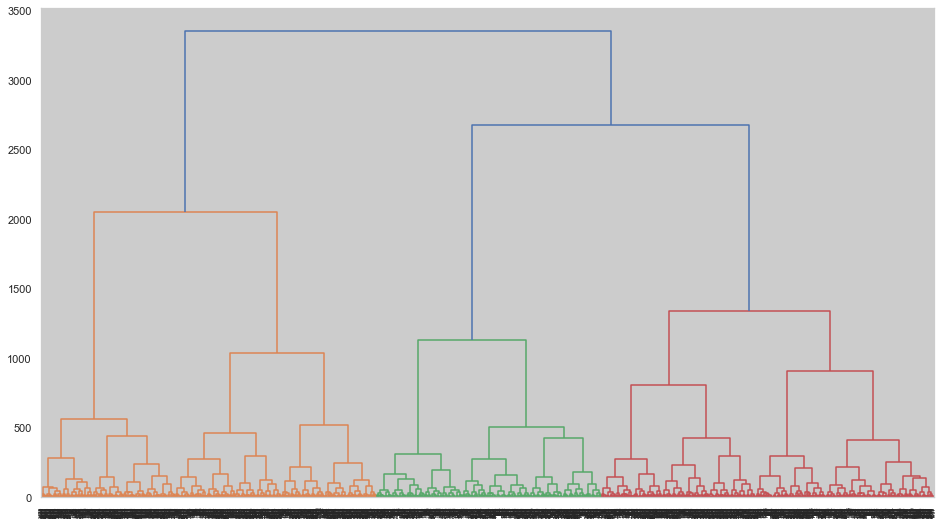

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.cluster import hierarchy
df2 = basketball3.apply(LabelEncoder().fit_transform)
df2.set_index('Games', inplace=True)
Z = hierarchy.linkage(df2, 'ward')
hierarchy.dendrogram(hierarchy.linkage(df2, method='ward'))
plt.show()

In [53]:
print('strict digraph tree {')
for row in d.items():
    print('    {0} -> {1};'.format(*row))
print('}')

strict digraph tree {
    Alonzo Harding Mourning -> 11;
    Charles Wade Barkley -> 11;
    Gary Dwayne Payton -> 22;
    Scottie Maurice Pippen -> 11;
    Anfernee Deon "Penny" Hardaway -> 11;
    Mitchell James "Mitch" Richmond, III -> 11;
    Jason Frederick Kidd -> 11;
    Antonio Keithflen McDyess -> 11;
    David Maurice Robinson -> 11;
    John Houston Stockton -> 11;
    Vincent Lamont "Vin" Baker -> 11;
    Grant Henry Hill -> 11;
    Julius Shareef Abdur-Rahim -> 11;
    Steven Delano "Steve" Smith -> 11;
    Timothy Duane "Tim" Hardaway -> 11;
    Allan Wade Houston -> 11;
    Vincent Lamar "Vince" Carter -> 11;
    Shaquille Rashuan O'Neal -> 11;
    Reginald Wayne "Reggie" Miller -> 11;
    Karl Malone -> 11;
    Walter Ray Allen -> 11;
    Hakeem Abdul Olajuwon -> 11;
    Kevin Maurice Garnett -> 11;
}


Note: you may need to restart the kernel to use updated packages.


In [65]:
circles = circlify.circlify(
    basketball3, 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

NameError: name 'circles' is not defined

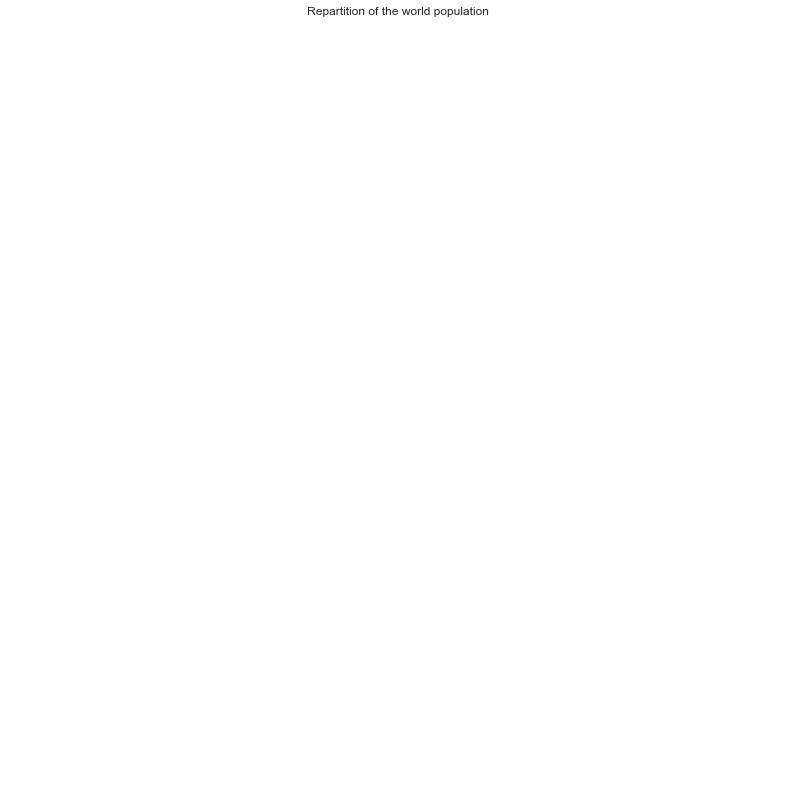

In [66]:
import circlify
import matplotlib.pyplot as plt

# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(14,14))

# Title
ax.set_title('Repartition of the world population')

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# Print circle the highest level (continents):
for circle in circles:
    if circle.level != 2:
      continue
    x, y, r = circle
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="lightblue"))

# Print circle and labels for the highest level:
for circle in circles:
    if circle.level != 3:
      continue
    x, y, r = circle
    label = circle.ex["id"]
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="#69b3a2"))
    plt.annotate(label, (x,y ), ha='center', color="white")

# Print labels for the continents
for circle in circles:
    if circle.level != 2:
      continue
    x, y, r = circle
    label = circle.ex["id"]
    plt.annotate(label, (x,y ) ,va='center', ha='center', bbox=dict(facecolor='white', edgecolor='black',
                                                                    boxstyle='round', pad=.5))




In [ ]:
#nx.draw_kamada_kawai(G, node_size=224, node_color='cyan', with_labels=True)
#nx.draw_kamada_kawai(G, node_size=224, node_color='cyan',)